In [5]:
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np

In [30]:
config_file = "configs/synthetic.json"
with open(config_file) as json_file:
    results = json.load(json_file)

# experiments = ['baseNN', 'softCBM', 'latentCBM', 'leakageLoss', 'leakageDelay', 'sequentialCBM', 'sequentialLeakage']
# experiments = ['softCBM', 'latentCBM', 'sequentialLeakage', 'hardCBM', 'hardLatentCBM', 'hardLeakageCBM', 'hardSequentialLeakage']
# experiments = ['sequentialCBM', 'sequentialLatentCBM', 'sequentialLeakage', 'hardSequentialLeakage', 'hardSequentialLatentCBM']
experiments = ['baseNN', 'softCBM', 'latentCBM', 'leakageLoss', 'leakageDelay', 'sequentialCBM', 'sequentialLeakage', 'sequentialLatentCBM', 'hardCBM', 'hardLatentCBM', 'hardLeakageCBM', 'hardSequentialLeakage', 'hardSequentialLatentCBM']
headers = ["Method", "Loss", "Label Accuracy", "Label Loss", "Concept Accuracy", "Concept Loss", "Latent Loss"]
headers = ["Method", "Label Accuracy", "Concept Accuracy", "Latent Loss"]
expr_results = []
for expr in experiments:
    expr_result = [expr]    
    expr_result.extend([float(results[expr]['results'].get(key)) for key in headers[1:]])
    expr_results.append(expr_result)
# expr_results = np.array(expr_results, dtype=float)

In [31]:
df = pd.DataFrame.from_records(expr_results, columns=headers)
display(df)

,Method,Label Accuracy,Concept Accuracy,Latent Loss
0,baseNN,0.50490,0.480738,0.000000
1,softCBM,0.48030,0.810969,0.000000
2,latentCBM,0.51770,0.829647,0.000000
3,leakageLoss,0.48800,0.806991,0.001372
4,leakageDelay,0.48575,0.812756,0.001682
5,sequentialCBM,0.52745,0.846456,0.074843
6,sequentialLeakage,0.52840,0.844612,0.001039
7,sequentialLatentCBM,0.55595,0.845256,0.000000
8,hardCBM,0.51545,0.834978,0.000000
9,hardLatentCBM,0.50735,0.823828,0.000000


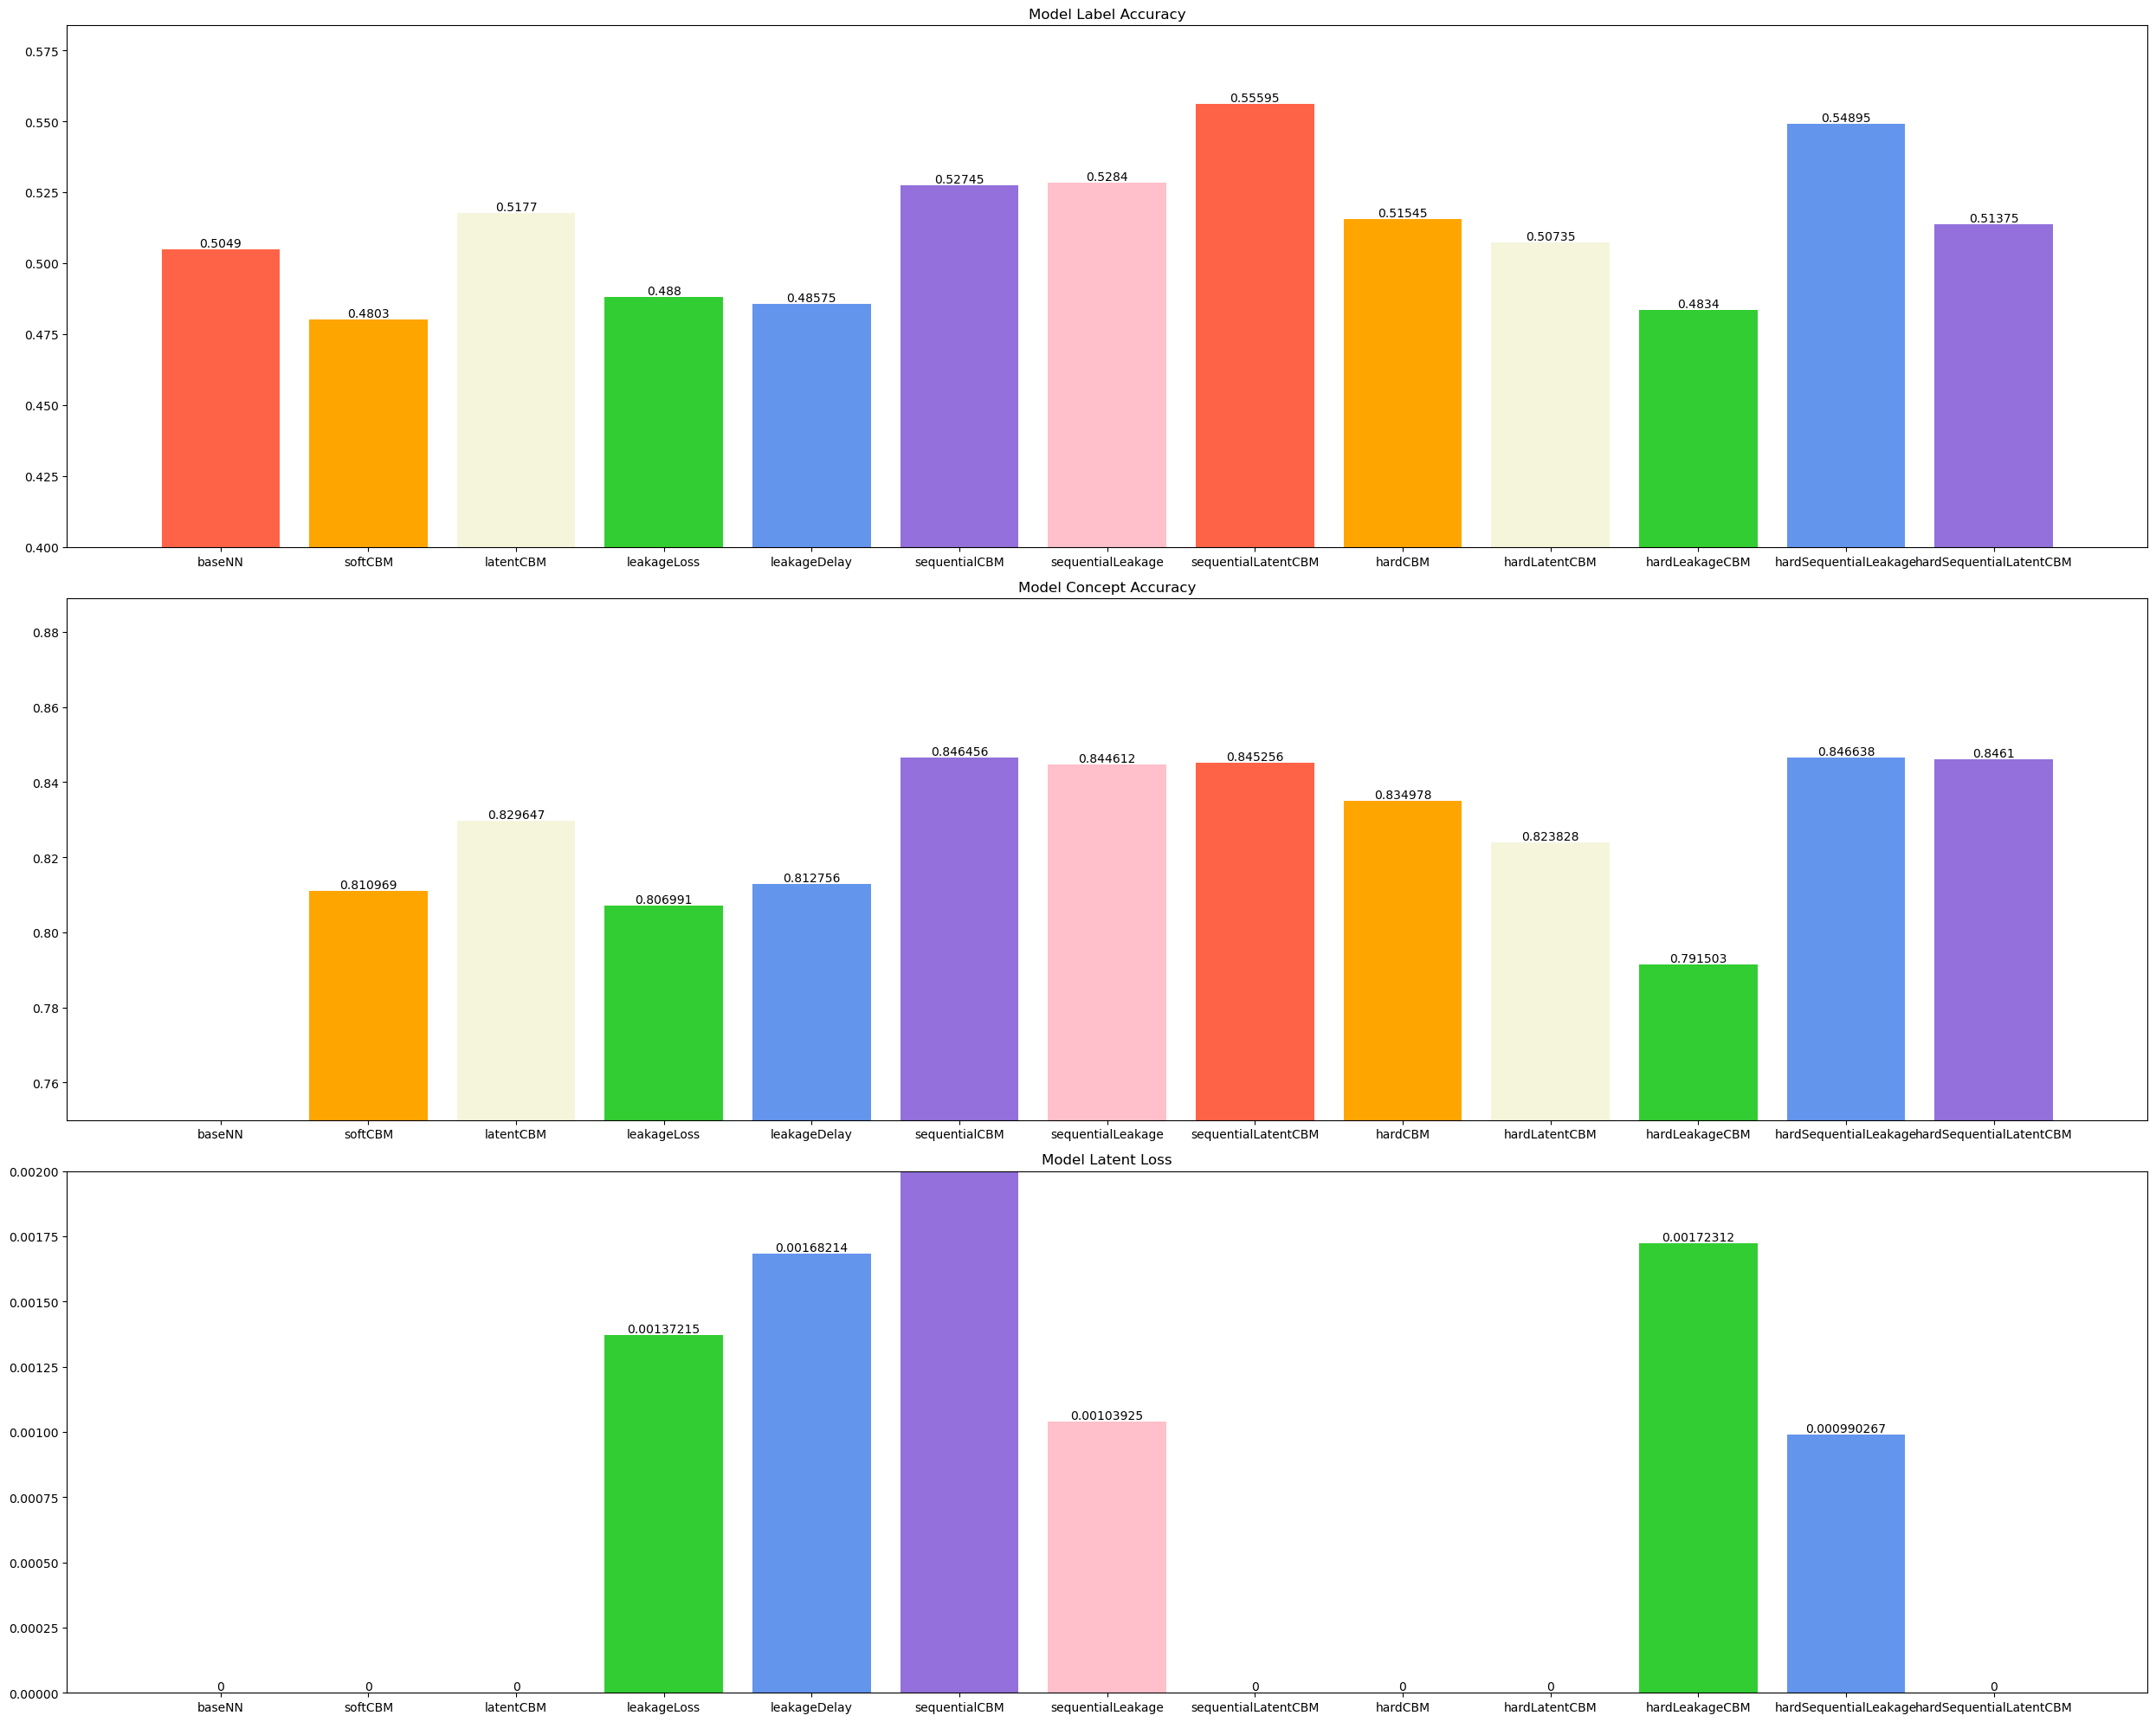

In [36]:
# plt.figure(figsize=(10,30))
fig, axs = plt.subplots(3, 1, figsize=(25, 20))
colors = ['tomato', 'orange', 'beige', 'limegreen', 'cornflowerblue', 'mediumpurple', 'pink']
for i in range(1, len(headers)):
    bar = axs[(i-1)%3].bar(experiments, df[headers[i]], color=colors)
    axs[(i-1)%3].set_title(f"Model {headers[i]}")
    axs[(i-1)%3].bar_label(bar, label_type='edge')

axs[0].set_ylim(bottom=0.4)
axs[1].set_ylim(bottom=0.75)
axs[2].set_ylim(top=0.002)
plt.tight_layout()
plt.show()
